# Week 7

## Библиотеки

In [483]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np

## Предобработка данных

In [507]:
# Загрузка и обработка данных
features = pd.read_csv('data/features.csv', index_col='match_id').drop(['duration', 'radiant_win', 
                                                                        'tower_status_radiant',
                                                                        'tower_status_dire', 
                                                                        'barracks_status_radiant', 
                                                                        'barracks_status_dire'], axis=1)
heroes = pd.read_csv('data/dictionaries/heroes.csv')
y = pd.read_csv('data/features.csv', index_col='match_id')['radiant_win']
# Поиск столбцов, в которых есть пропуски в данных
array_header = [i for i in features.columns 
                if sum(pd.value_counts(features[i].values, sort=False))!=len(features.values)]
# Замена пропусков и нулями. Создание итоговой матрицы Объект-Признак и ответов.
X = features.fillna(value=0)

# Нормализация признаков
X_norm = StandardScaler().fit(X).transform(X)
X_no_cat = X.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 
                   'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)
X_norm_catcat = StandardScaler().fit(X_no_cat).transform(X_no_cat)

X_pick = np.zeros((X.shape[0], len(heroes)))
for i, match_id in enumerate(X.index):
    for p in xrange(5):
        X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    
X_word = pd.concat([X_no_cat, pd.DataFrame(X_pick, index=X.index)], axis=1)
X_norm_word = StandardScaler().fit(X_word).transform(X_word)

## Функции

In [513]:
def score_mean_logistic(X, y, Num_Task):
    C = map(lambda x: 10**x, range(-5,6))
    kf = KFold(n_splits=5, shuffle=True)
    print 'Task_'+ str(Num_Task)
    result, time = [], []
    for i in C: 
        clf = LogisticRegression(C=i, random_state=241)
        start_time_training = datetime.datetime.now()
        out_array = np.mean(cross_val_score(clf, X, y, cv=kf, scoring='roc_auc'))
        time_work = datetime.datetime.now() - start_time_training
        result.append(out_array)
        time.append(time_work)
        print 'C =', i,'Mean_scoring =', out_array, 'Time_training:', str(time_work) +'s', '\n'
    return result, time, C

def score_mean_gradboost(X, y):
    n = map(lambda x: 10*x, range(1,10))
    kf = KFold(n_splits=5, shuffle=True)
    print 'Task_GradientBoost'
    result, time = [], []
    for i in n: 
        clf = GradientBoostingClassifier(n_estimators=i, random_state=241)
        start_time_training = datetime.datetime.now()
        out_array = np.mean(cross_val_score(clf, X, y, cv=kf, scoring='roc_auc'))
        time_work = datetime.datetime.now() - start_time_training
        result.append(out_array)
        time.append(time_work)
        print 'n =', i,'Mean_scoring =', out_array, 'Time_training:', str(time_work) +'s', '\n'
    return result, time, n

def optim(x, tol):
    for i in range(len(x) - 1):
        if np.abs(x[i+1] - x[i]) > tol:
            optim = x[i+1]
    return np.where(x==optim)[0][0] 

## Обучение

In [501]:
# Обучение градиентный бустинг
result, time, n = score_mean_gradboost(X, y)

Task_GradientBoost
n = 10 Mean_scoring = 0.66461676637 Time_training: 0:00:47.779432s 

n = 20 Mean_scoring = 0.681778045186 Time_training: 0:01:25.973428s 

n = 30 Mean_scoring = 0.689447482042 Time_training: 0:02:03.582356s 

n = 40 Mean_scoring = 0.693627766457 Time_training: 0:02:50.943981s 

n = 50 Mean_scoring = 0.69738277627 Time_training: 0:03:20.668958s 

n = 60 Mean_scoring = 0.700493172566 Time_training: 0:04:09.008844s 

n = 70 Mean_scoring = 0.702011747168 Time_training: 0:04:58.167115s 

n = 80 Mean_scoring = 0.703918737092 Time_training: 0:05:36.692178s 

n = 90 Mean_scoring = 0.705264877213 Time_training: 0:06:02.702865s 



In [514]:
# Обучение логистической регрессии
result_1, time_1, C_1 = score_mean_logistic(X_norm, y, 1)
result_2, time_2, C_2 = score_mean_logistic(X_norm_no_cat, y, 2)
result_3, time_3, C_3 = score_mean_logistic(X_norm_word, y, 3)

Task_1
C = 1e-05 Mean_scoring = 0.695139311554 Time_training: 0:00:05.313597s 

C = 0.0001 Mean_scoring = 0.711336336324 Time_training: 0:00:09.221526s 

C = 0.001 Mean_scoring = 0.7161916355 Time_training: 0:00:13.547714s 

C = 0.01 Mean_scoring = 0.716370292736 Time_training: 0:00:18.147708s 

C = 0.1 Mean_scoring = 0.716362389024 Time_training: 0:00:18.990170s 

C = 1 Mean_scoring = 0.716507549805 Time_training: 0:00:19.907182s 

C = 10 Mean_scoring = 0.716498802362 Time_training: 0:00:18.033237s 

C = 100 Mean_scoring = 0.716447145429 Time_training: 0:00:20.166188s 

C = 1000 Mean_scoring = 0.716195964002 Time_training: 0:00:21.464740s 

C = 10000 Mean_scoring = 0.716368323488 Time_training: 0:00:19.588072s 

C = 100000 Mean_scoring = 0.716292553065 Time_training: 0:00:20.852680s 

Task_2
C = 1e-05 Mean_scoring = 0.695161416632 Time_training: 0:00:04.686877s 

C = 0.0001 Mean_scoring = 0.711326077548 Time_training: 0:00:06.892402s 

C = 0.001 Mean_scoring = 0.716253257067 Time_trai

## Результаты

Признаки с пропусками:  first_blood_time, first_blood_team, first_blood_player1, first_blood_player2, radiant_bottle_time, radiant_courier_time, radiant_flying_courier_time, radiant_first_ward_time, dire_bottle_time, dire_courier_time, dire_flying_courier_time, dire_first_ward_time 

Количество деревьев n = 90
Оптимальная значение ROC_AUC = 0.705264877213
Время обучения = 0:06:02.702865 

Оптимальный коэффицент регуляризации C = 0.001
Оптимальная значение ROC_AUC = 0.7161916355
Время обучения = 0:00:13.547714 

Оптимальный коэффицент регуляризации C = 0.001
Оптимальная значение ROC_AUC = 0.716253257067
Время обучения = 0:00:11.157395 

Оптимальный коэффицент регуляризации C = 0.001
Оптимальная значение ROC_AUC = 0.751649765515
Время обучения = 0:00:26.345067 

Количество уникальных индетификаторов = 108


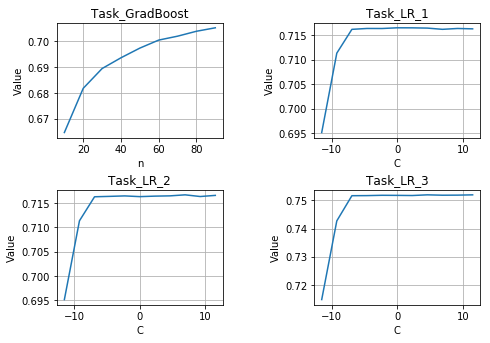

In [517]:
%matplotlib inline
plt.figure()
# l
plt.subplot(221)
plt.plot(n, result)
plt.xlabel('n')
plt.ylabel('Value')
plt.title('Task_GradBoost')
plt.grid(True)

# 2
plt.subplot(222)
plt.plot(np.log(C), result_1)
plt.xlabel('C')
plt.ylabel('Value')
plt.title('Task_LR_1')
plt.grid(True)

# 3 
plt.subplot(223)
plt.plot(np.log(C), result_2)
plt.xlabel('C')
plt.ylabel('Value')
plt.title('Task_LR_2')
plt.grid(True)

# 3 
plt.subplot(224)
plt.plot(np.log(C), result_3)
plt.xlabel('C')
plt.ylabel('Value')
plt.title('Task_LR_3')
plt.grid(True)

plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.45,wspace=0.55)

print 'Признаки с пропусками: ', ', '.join(array_header), '\n'

print 'Количество деревьев n =', n[optim(result, 0.001)]
print 'Оптимальная значение ROC_AUC =', result[optim(result, 0.001)]
print 'Время обучения =', time[optim(result, 0.001)], '\n'

print 'Оптимальный коэффицент регуляризации C =', C_1[optim(result_1, 0.001)]
print 'Оптимальная значение ROC_AUC =', result_1[optim(result_1, 0.001)]
print 'Время обучения =', time_1[optim(result_1, 0.001)], '\n'

print 'Оптимальный коэффицент регуляризации C =', C_2[optim(result_2, 0.001)]
print 'Оптимальная значение ROC_AUC =', result_2[optim(result_2, 0.001)]
print 'Время обучения =', time_2[optim(result_2, 0.001)], '\n'

print 'Оптимальный коэффицент регуляризации C =', C_3[optim(result_3, 0.001)]
print 'Оптимальная значение ROC_AUC =', result_3[optim(result_3, 0.001)]
print 'Время обучения =', time_3[optim(result_2, 0.001)], '\n'

print 'Количество уникальных индетификаторов =', len(X['d1_hero'].unique())

## Тестирование на новых данных

In [523]:
features_test = pd.read_csv('data/features_test.csv', index_col='match_id')
X_test = features_test.fillna(value=0)
X_no_cat_test = X_test.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 
                   'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)
X_pick_test = np.zeros((X_test.shape[0], len(heroes)))
for i, match_id in enumerate(X_test.index):
    for p in xrange(5):
        X_pick_test[i, X_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, X_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    
X_word_test = pd.concat([X_no_cat_test, pd.DataFrame(X_pick_test, index=X_test.index)], axis=1)
X_norm_word_test = StandardScaler().fit(X_word_test).transform(X_word_test)

clf = LogisticRegression(C=0.001, random_state=241)
clf.fit(X_norm_word, y)
out_array = clf.predict_proba(X_norm_word_test)
print 'Max = ', np.max(out_array[:,1]), 'Min =', np.min(out_array[:,1])

Max =  0.994842213646 Min = 0.00989181699203
